Import the IKPy module

In [1]:
import ikpy
import numpy as np
from ikpy import plot_utils

Create a chain from a URDF file

In [2]:
my_chain = ikpy.chain.Chain.from_urdf_file("../../resources/poppy_ergo.URDF")

Prepare your desired position as a 4x4 matrix. Here we only consider position, not orientation of the chain.

In [3]:
target_vector = [ 0.1, -0.2, 0.1]
target_frame = np.eye(4)
target_frame[:3, 3] = target_vector

# Inverse kinematics

In [4]:
print("The angles of each joints are : ", my_chain.inverse_kinematics(target_frame))

The angles of each joints are :  [ 0.          0.77375195 -1.26611132  0.3230264  -0.75260301  1.03033218
  0.        ]


You can check that the Inverse Kinematics is correct by comparing with the original position vector : 

In [5]:
real_frame = my_chain.forward_kinematics(my_chain.inverse_kinematics(target_frame))
print("Computed position vector : %s, original position vector : %s" % (real_frame[:3, 3], target_frame[:3, 3]))

Computed position vector : [ 0.0999999  -0.1999999   0.09999988], original position vector : [ 0.1 -0.2  0.1]


# Plotting
And finally plot the result : 

Populating the interactive namespace from numpy and matplotlib


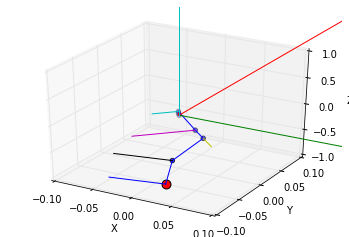

In [10]:
%pylab inline

ax = plot_utils.init_3d_figure()
my_chain.plot(my_chain.inverse_kinematics(target_frame), ax, target=target_vector)
xlim(-0.1, 0.1)
ylim(-0.1, 0.1)

plot_utils.show_figure()

You're done! Go to the next [section](https://github.com/Phylliade/ikpy/tree/master/src/ikpy/README.md) to understand the general concepts of the library.